# Attention !!!
- Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.
- Only TODO 1, 2, 3, 4, 5, 6, 10, 11 will be graded.
- **Extra credit:** 1% of total grade for Com Eng Math 2 for TODO 7, 8, 9 (1/3 each.)

# Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.

TODO#1: Write functions that samples from the following distribution
1. $\mathcal{N}(0,1)$
2. $Bernoulli(0.3)$
3. $B(10, 0.3)$
4. $Multinomial(n=10, p=[0.3,0.2,0.5])$
5. $U(0,1)$
<!-- 6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(b, K):\frac{(b-a)K}{2}=1$. -->
6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(\frac{a+b}{2}, K):\frac{(b-a)K}{2}=1$.

Capture screenshot of the histogram for each of the distribution and paste them on the pdf file. The example is shown below.

Hint: see scipy.stats for common distributions.
[plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) should be helpful for plotting histograms

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom, multinomial, uniform, expon, triang


def sample_normal(sample_size=10, mu=0, std=1):
  '''Normal'''
  distribution = norm(loc=mu,
                      scale=std)
  samples = distribution.rvs(size=sample_size)

  return samples

def sample_bernoulli(sample_size=10, p=0.3):
  '''Bernoulli'''
  distribution = bernoulli(p=p)
  samples = distribution.rvs(size=sample_size)

  return samples


def sample_binomial(sample_size=10, n=10, p=0.3):
  '''Binomial'''
  distribution = binom(n=n,
                       p=p)
  samples = distribution.rvs(size=sample_size)

  return samples 


def sample_multinomial(sample_size=10, n=10, p=[0.3, 0.2, 0.5]):
  '''Multinomial'''
  distribution = multinomial(n=n,
                             p=p)
  samples = distribution.rvs(size=sample_size)

  return samples


def sample_uniform(sample_size=10, from_x=0, to_x=1):
  '''Uniform'''
  distribution = uniform(loc=from_x,
                             scale=(to_x-from_x))
  samples = distribution.rvs(size=sample_size)

  return samples


def sample_triangle(sample_size=10, a=0, b=1):
  '''Triangle'''
  distribution = triang(loc=a,
                        scale=b-a,
                        c=0.5)
  samples = distribution.rvs(size=sample_size)
  
  return samples


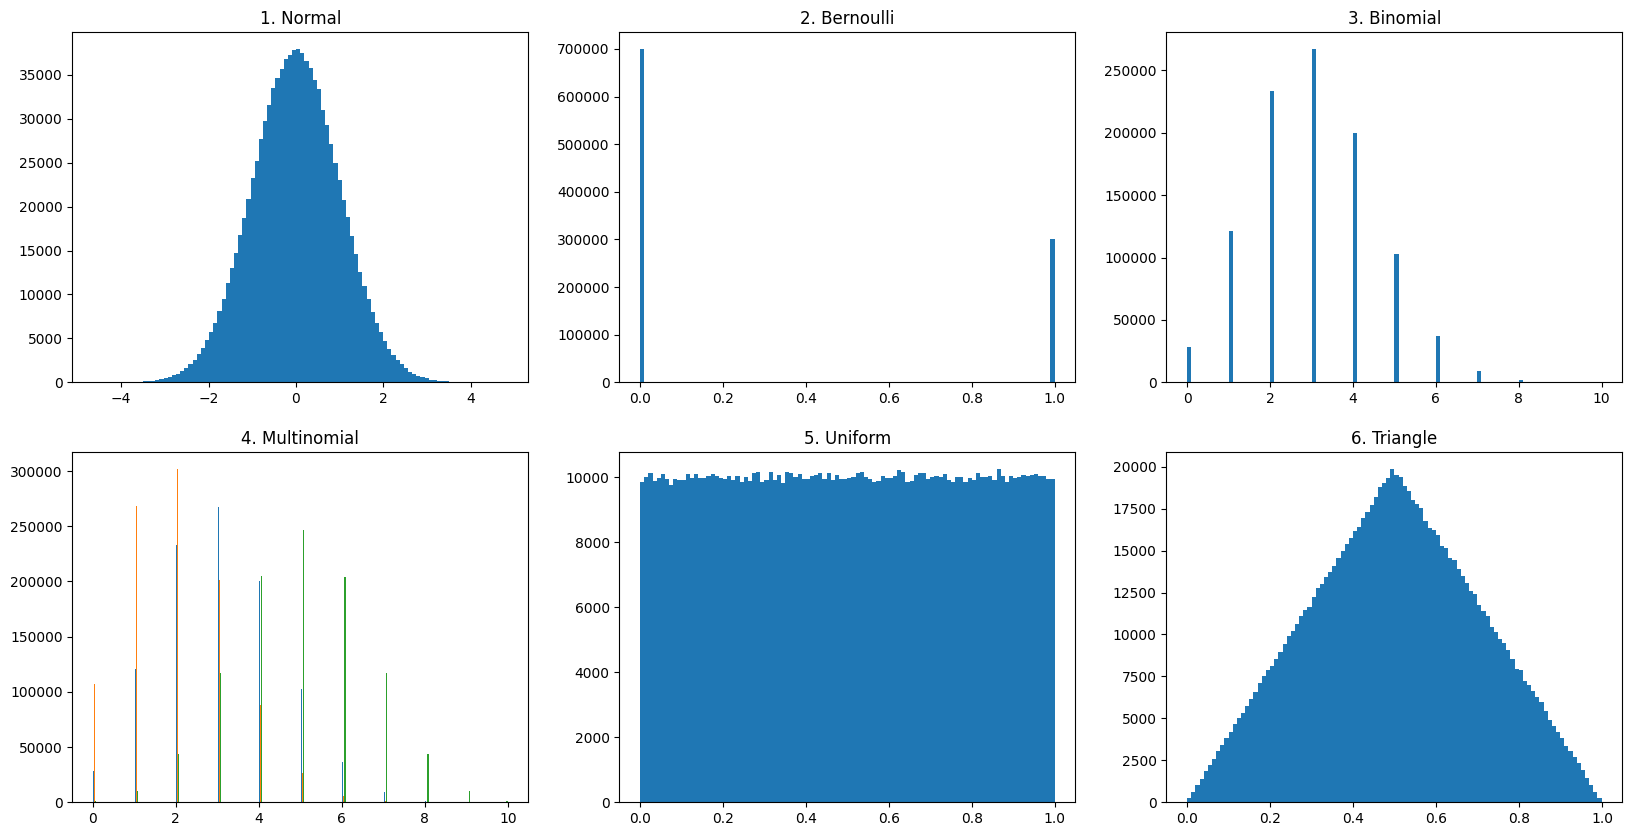

In [56]:
# Use this code block to show your sampling result.
SAMPLE_SIZE = 1000000
plt.figure(figsize=(20, 10))
for idx, fn in enumerate([sample_normal, sample_bernoulli, sample_binomial, sample_multinomial, sample_uniform, sample_triangle]):
    s = fn(sample_size=SAMPLE_SIZE)
    plt.subplot(2, 3, idx+1)
    count, bins, ignored = plt.hist(s, 100)
    plt.title(str(idx+1)+'. '+fn.__doc__)

plt.show()

# Law of large number

### Law of large number

**TODO#2:** Using a sampling function from TODO#1.1, Plot the graph that shows the relation between an empirical mean and sampling size from 1 up to 10000.
What does the graph imply about the difference between the empirical mean and the theoritical mean?

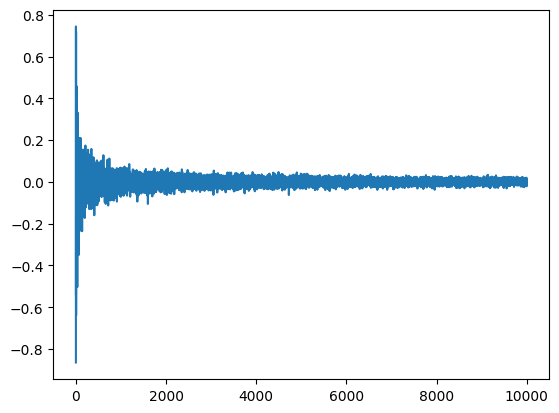

In [60]:
MU = 0
STD = 1

sample_sizes = []
emp_means =  []
for i in range(1,10001):
    sample_sizes.append(i)

    random_vars = sample_normal(sample_size=i,
                               mu=MU,
                               std=STD)
    mean = np.mean(random_vars)

    emp_means.append(mean)

plt.plot(emp_means)

'''
In this case, theoritical mean is 0. 
With a small sample size, mean is vary between -1 and 1, but the larger sample size make the emperical mean convergence to real MU (0).
'''

### Law of large number for histogram

The histogram is used to approximate the PDF of an unknown distribution.
The bin in the histogram represents the frequency of the event happening inside the bin range.

**TODO#3:** Given a fix bin number of 40. Plot the histogram of the data sampling from the function, `sample_normal(n, 0, 1)`, for different sizes of sample: 500, 1k, 5k and 10k.
Compare and explain the relation between the approximation given by the histogram and the true PDF for each of the sample size.

'\nThere are possible to sample the data \n'

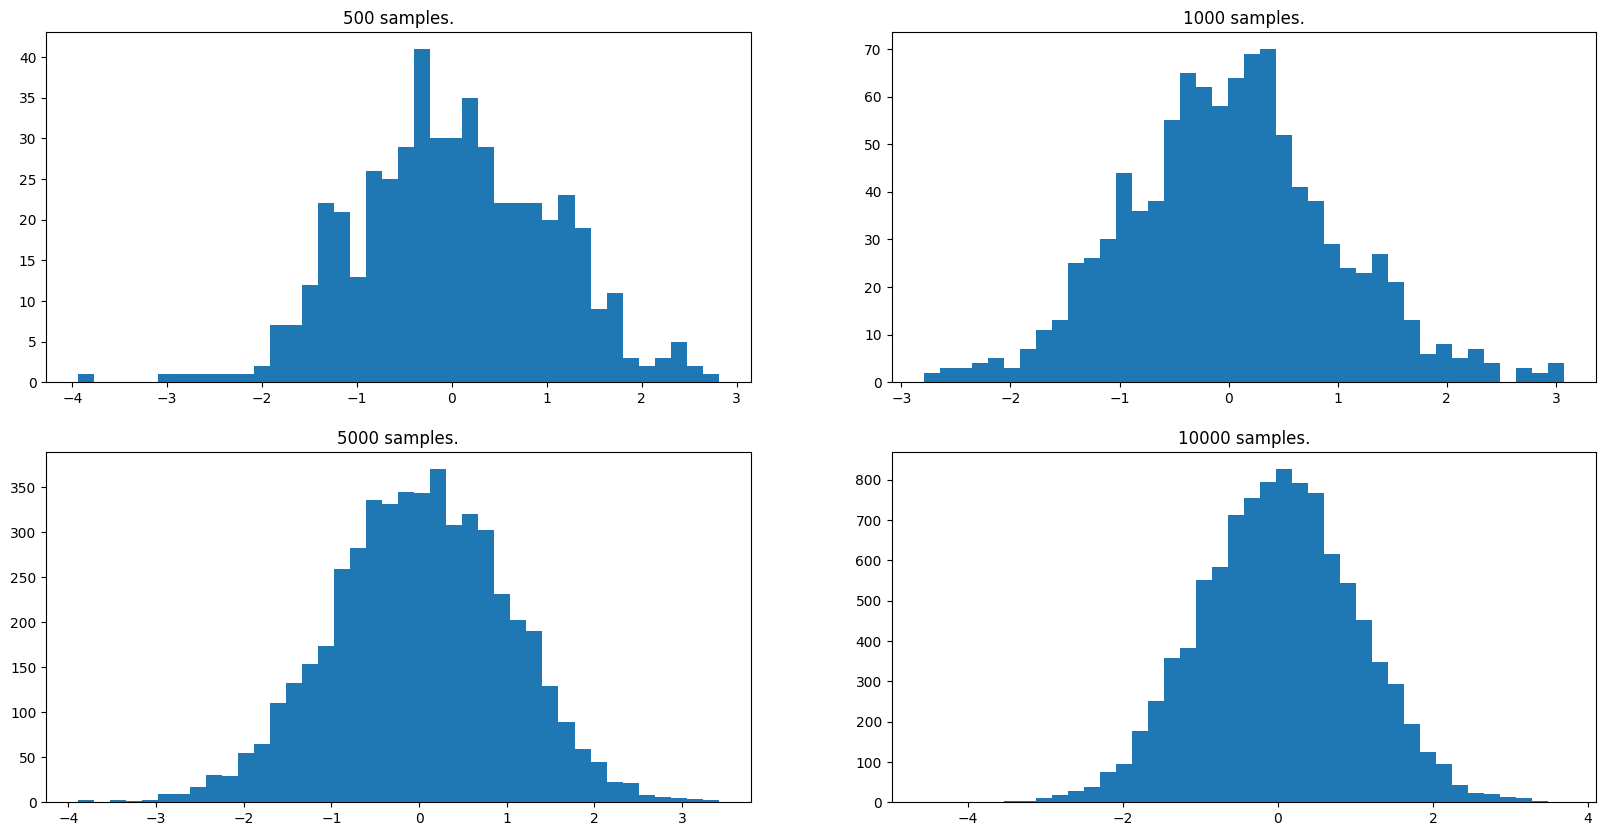

In [64]:
plt.figure(figsize=(20, 10))
for idx, sample_size in enumerate([500, 1000, 5000, 10000]):
    plt.subplot(2, 2, idx+1)
    plt.title(f'{sample_size} samples.')
    plt.hist(sample_normal(sample_size, 0, 1), 40)

'''
There are possible to form a sample set that has mean and std. different from the expected sample distribution if the sample size is small.
From the given figure, the big sample size such as 5,000 or 10,000 samples can fit to the true PDF of normal distribution with small error.
'''

## Central limit theorem

In this part we will use the Central Limit Theorem to approximate the true probabity of getting more than 40 heads when an unfair coin, with the probability 0.3 of being head, is tossed 100 times.


**TODO#4:** Simulate multiple coin tosses to construct a histrogram from the outcomes. Plot the histogram. Hint: x-axis should represents the number of heads when the coin is tossed 100 times. Does this histogram looks like a normal distribution?

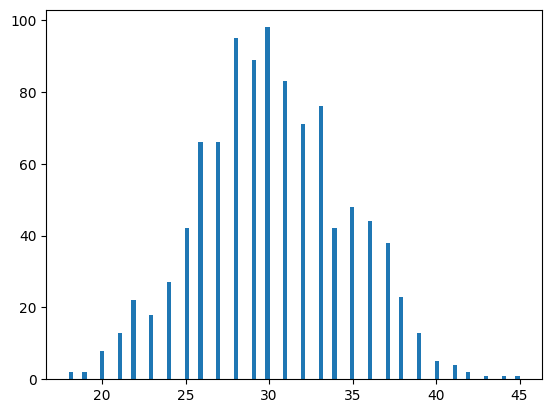

'This distribution is look like normal distribution that has mean around 27-33 and sd arounf 2-7'

In [84]:
import random
tosses_rec = []
ITER = 1000
for i in range(ITER):
    head_nums = 0
    for j in range(100):
        if random.random() < 0.3:
            head_nums += 1
    tosses_rec.append(head_nums)

plt.hist(tosses_rec,101)
plt.show()

'''This distribution is look like normal distribution that has mean around 27-33 and sd arounf 2-7'''

**TODO#5:** Use CLT to find the probability of getting more than 40 heads.

**TODO#6:** Compare and find the difference between CLT's approximation and the actual probability using the binomial distribution.

In [97]:
import math
from scipy.stats import norm

n = 100
p = 0.3
k_min = 40

# Calculate mean and standard deviation
mu = n * p
sigma = math.sqrt(n * p * (1 - p))

# Use normal approximation
z_score = (k_min - mu) / sigma
probability = 1 - norm.cdf(z_score)

print("Probability of getting heads at least 40 times in 100 tosses (using CLT):", probability*100)


Probability of getting heads at least 40 times in 100 tosses (using CLT): 1.4548165870626129


# Algebra of Random Variables

Given an independent random variable $X$ and $Y$, such that $X \sim F$ and $Y \sim U(3,5)$. The summation of those two is written as $Z = X + Y$ and the PDF of $F$ is defined below.
$$
F(X) =
\begin{cases}
0.1, & -2<=X<=0\\
0.4, & 0<X<=2 \\
\end{cases}
$$
**TODO#7:** Find $P( 3 < Z < 5 )$.

# Correlation

The correlation captures the linear relationshi between two sets of random variables. The higher magnitude of the correlation indicates a stronger relationship.


**TODO#8:** Find the correlation of $X$ and $Y = X + A$, given that $X \sim U(-1,1)$ and
1. $A = 10$
2. $A \sim U(-1,1)$
3. $A \sim U(-10,10)$
4. $A \sim U(-100,100)$


**TODO#9:** From the results in TODO#8, answer following questions
1. Does the correlation decrease as we increase the randomness of A ?
2. Explain the result when we change from $A \sim U(-10,10)$ to $A \sim U(9090,10010)$. Hint: Compare the result with $A$ and $A + 10000: A \sim U(-10,10) $

# Hamtaro and his cloud storage empire.



After the success in the manufacturing business. Hamtaro wants to expand his business into a new sector.
Since cloud computing is currently booming, he decides to enter into the cloud storage business.

The storage disk that Hamtaro uses can operate only in the temperature of $[0,30]$ degree Celcius. The disk has the prabability of a read failure $P(Fail|t) = \frac{0.97}{2250}(t-15)^2+0.001$ where $t$ is the operating temperature.
<!-- Hamtaro's disks has a special architecture that can be  simultaneously read by infinite requests at the same time. However, a failure of one request will cause all of its parallels to fail. -->

Since Hamtoro doesn't want any failures in his service, he decides to buy a super luxury air-conditioning system to control the temperature in his data warehouse. Even if the air conditioner is extremely expensive, the room temperature is still not stable. When Hamtaro tries to set the tempurature to $\mu$, the actual temperature is random and can be modeled by $t\sim U(\mu-1,\mu+1)$.

**TODO#10:** Answer the following questions.
1. What is the temperature that Hamtaro should set the air conditioner to? Justify your answer.
2. What is the probability of failure at the temperature used in part 1?
<!-- 3. If Hamtaro want to handle 10k concurrent requests, what is the minimum disks should Hamtoro has to make 99.99% of disk availability and how should he split the workloads? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to be read at the same time. -->
3. What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
4. **Extra** The temperature is now modeled by $t\sim \mathcal{N}(\mu,9)$ instead of $t\sim U(\mu-1,\mu+1)$. Repeat question 1-3.

**Hint:** `scipy.integrate.quad` can help you do integration.

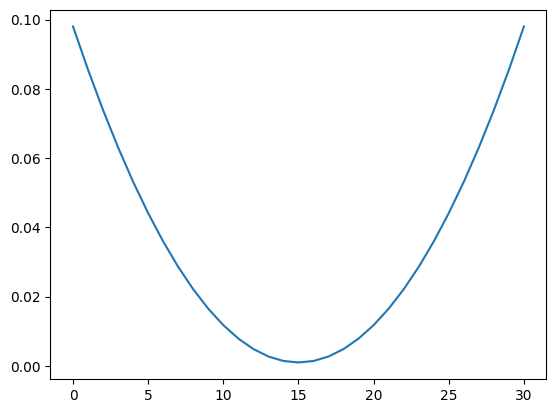

In [85]:
# Question 1
def P(t):
    return (0.97/2250)*(t-15)**2 + 1e-3
## plot prob of fail on t
temp = np.linspace(0,30,31)
fail_prob = P(temp)
## plot function
plt.plot(fail_prob)

'''
From the figure showed below, The temperature that Hamtaro should set is **15**(the lowest fail prob point)
'''

In [88]:
# Question 2
import scipy
TARGET_TEMP = 15

ret = scipy.integrate.quad(P, TARGET_TEMP-1, TARGET_TEMP+1)
fail_prob = ret[0]

print(f'If set temperature to {TARGET_TEMP}, The fail prob = {fail_prob*100:.2f}%')

If set temperature to 15, The fail prob = 0.23%


# Moontaro
![picture](https://i.redd.it/mcveltqx2j071.png)

Recently, cryptocurrency investment has become extremely popular due to its extraordinarily high rates of return. Though many people consider it a risky investment, Hamtaro does not want to miss this opportunity and start gathering information about these coins. His research suggests that four coins, namely $a$, $b$, $c$, and $d$, have a promising future to go to the moon.


Hamtaro wants to run simulations to validate his chances. As the value of the coins is non-deterministic, he models it sequentially based on their historical values (a.k.a. autoregressive model). The price of coin $i$ at day $t$ is formulated as

$p_{i,t} = p_{i,t-1} \times r_{i,t}$, where $i \in \{a, b, c, d\}$, and  $p_{i, 0} = 10$.

The rates $r_{i,t}$, are drawn from a multivariant guassian distribution $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, where $\mu = [1.003, 1.002, 1.004, 1.004]^T$ and $\mathbf{\Sigma}$ as given below:

$\mathbf{\Sigma}$ | a | b | c | d
--- | --- | --- | --- |---
a |  10 x 10$^{-3}$ | 0 | 4 x 10$^{-3}$ | 5 x 10$^{-3}$
b |  0  | 3 x 10$^{-3}$ | 0 | 0
c |  4 x 10$^{-3}$  | 0 | 12 x 10$^{-3}$| 2 x 10$^{-3}$
d |  5 x 10$^{-3}$  | 0 | 2 x 10$^{-3}$ | 15 x 10$^{-3}$


<!-- 1. Are $p_{a,t}$ and $p_{b,t}$ independent ? Why ?
2. Are $p_{a,t}$ and $p_{c,t}$ independent ? Why ?
3. Are $p_{a,t}$ and $p_{d,t}$ independent ? Why ? -->

**TODO11:**
1. Which pairs of coins are independent? Why?
2. Given the following definitions:
  - <b>Return</b> :  a coin price at day $T$ minus the price at day 0, i.e., the return of coin $i$ at day $T = p_{i,T} - p_{i, 0}$.
  - <b>Expected return</b> : the average return from 10000 distinct simulated end prices.
  
  Simulate the expected return for each coin if Hamtaro wants to sell his coins 30 and 180 days after buying $(T \in \{30, 180\})$.
  hint: you should write reusable functions to make your life easier.

3. Which coin has the highest probability of having profit (end price is higher than start price)? Compare the variance of the return with other coins.

4. How can the expected return be positive while having around 50\% chance of profitability?

After simulating the price of individual coins, Hamtaro now proposes seven investment strategies (portfolio) to maximize the profit. The detail of each strategy is shown in the table below.  

Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|  |  |
2  | 0%   | 100% | 0%  |    0%|  |  |
3  | 0%   | 0%   | 100%|    0%|  |  |
4  | 0%   | 0%   |   0%|  100%|  |  |
5  | 50%  | 50%  | 0%  |    0%|  |  |
6  | 50%  | 0%   | 50% |    0%|  |  |
7  | 50%  | 0%   |  0% |   50%|  |  |

5. Fill the empty values in the table (both $T = 30, 180$).
6. Which strategy yields the highest return?
7. Which strategy is the safest one?
8. Compare the variances between the stategy 6 and 7. What happens, and why is this the case? **Hint:** Consider cov($r_a$, $r_c$) and cov($r_a$, $r_d$).
9. From the problems above, come up with a general practice for good investment? Please also state your reasoning. You can include additional simulations to support the argument.

In [155]:
from scipy.stats import multivariate_normal
def N_sampler(sample_size = 1,
              mu = [1.003, 1.002, 1.004, 1.004],
              cov = [
                  [10e-3,   0,      4e-3,   5e-3],
                  [0,       3e-3,   0,         0],
                  [4e-3,    0,      12e-3,  2e-3],
                  [5e-3,    0,      2e-3,   15e-3]
              ]):
    distributor = multivariate_normal(mean=mu, cov=cov)

    sample = distributor.rvs(size=sample_size)

    return sample

In [185]:
# Question 2
def simulate_price(scerio_day = 30,
                   population = 10000,
                   verbose = 0):
    coin_price = []
    for simulation_id in range(population):
        r = N_sampler(sample_size=scerio_day)
        row_prod = np.prod(r, axis=0)
        coin_price.append([10, 10, 10, 10] * row_prod)
    coin_price = np.array(coin_price)
    expected_price = np.sum(coin_price - 10, axis = 0) / 10000

    if verbose:
        print(f'For {scerio_day} day scenario.')
        for coin_idx in range(4):
            print(f'{chr(ord("a")+coin_idx)} : expected return = {expected_price[coin_idx]}')

    return coin_price, expected_price

for day in [30, 180]:
    simulate_price(scerio_day=day,verbose=1)

For 30 day scenario.
a : expected return = 0.9193303288563136
b : expected return = 0.6113910631557756
c : expected return = 1.351479740449427
d : expected return = 1.2499631274203835
For 180 day scenario.
a : expected return = 6.852631202573179
b : expected return = 4.29792586950387
c : expected return = 10.284403308487498
d : expected return = 10.034825119587945


In [192]:
# Question 3
ret, expected_return = simulate_price(scerio_day=100)

mean_price = np.mean(ret, axis=0)
var_return = np.var(ret-10, axis=0)

prob_profit = np.mean(ret>10, axis=0)

print(expected_return, mean_price, var_return, prob_profit, sep='\n')

'''
so highest probability to get profit is coin a which above 50% and has lowest var.
other coin have a lot var and low prob. 
'''

[3.31035408 2.09304777 4.81342217 4.72418056]
[13.31035408 12.09304777 14.81342217 14.72418056]
[280.42695637  50.6214813  485.87413989 647.67620538]
[0.4161 0.5312 0.4271 0.3896]


'\nso highest probability to get profit is coin a which above 50% and has lowest var.\nother coin have a lot var and low prob. \n'

In [ ]:
# Question 4
'''
expected return is compute by normal mean of all 10,000 simulation. 
Those 10,000 simulation may 40% profit rate but give a lot profit and 60% lose not lose money that much compare to the profit scenario.
'''

In [211]:
# Question 5
for day in [30, 180]:
    print(f'{day} Day')
    for profile in [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0.5, 0.5, 0, 0],
        [0.5, 0, 0.5, 0],
        [0.5, 0, 0, 0.5]]:
        print(f'\tProfile : {profile}')
        ret, expected_return = simulate_price(scerio_day=day, verbose=0)

        mean_return = np.sum(np.mean((ret-10)*profile, axis=0))
        expected_return = np.sum(expected_return* profile)
        var_return = np.sum(np.var((ret-10)*profile, axis=0))

        prob_profit = np.sum(np.sum((ret-10)*profile,axis=1) >0, axis=0) / 10000

        # print(f'\t\tMean return\t: {mean_return}')
        print(f'\t\tExpected return\t: {expected_return}')
        print(f'\t\tVar return\t: {var_return}')
        print(f'\t\tProb profit\t: {prob_profit*100:.2f}%')


30 Day
	Profile : [1, 0, 0, 0]
		Expected return	: 0.9269519934856622
		Var return	: 41.918254689931
		Prob profit	: 45.84%
	Profile : [0, 1, 0, 0]
		Expected return	: 0.6011664434413367
		Var return	: 10.661042984360622
		Prob profit	: 51.53%
	Profile : [0, 0, 1, 0]
		Expected return	: 1.319360884219122
		Var return	: 53.3859566030853
		Prob profit	: 46.79%
	Profile : [0, 0, 0, 1]
		Expected return	: 1.2404718396514742
		Var return	: 73.19097548622743
		Prob profit	: 43.46%
	Profile : [0.5, 0.5, 0, 0]
		Expected return	: 0.7834983750368182
		Var return	: 13.07601597631611
		Prob profit	: 51.52%
	Profile : [0.5, 0, 0.5, 0]
		Expected return	: 1.167621062679905
		Var return	: 23.458230598760757
		Prob profit	: 50.01%
	Profile : [0.5, 0, 0, 0.5]
		Expected return	: 1.1209790138107374
		Var return	: 27.91058650624848
		Prob profit	: 47.81%
180 Day
	Profile : [1, 0, 0, 0]
		Expected return	: 7.2957213048713605
		Var return	: 1411.224476696984
		Prob profit	: 39.72%
	Profile : [0, 1, 0, 0]


30 Days
Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|0.94  |40.96  |46.08%
2  | 0%   | 100% | 0%  |    0%|0.63  |10.77  |52.25%
3  | 0%   | 0%   | 100%|    0%|1.15  |50.98  |45.82%
4  | 0%   | 0%   |   0%|  100%|1.32  |70.56  |44.33%
5  | 50%  | 50%  | 0%  |    0%|0.79  |13.48  |52.00%
6  | 50%  | 0%   | 50% |    0%|1.28  |24.57  |49.51%
7  | 50%  | 0%   |  0% |   50%|0.98  |26.17  |47.29%

180 Days
Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|8.16  |1694.50  |40.62%
2  | 0%   | 100% | 0%  |    0%|4.25  |142.56   |54.61%
3  | 0%   | 0%   | 100%|    0%|10.39 |3972.09  |40.50%
4  | 0%   | 0%   |   0%|  100%|10.57 |5772.08  |34.77%
5  | 50%  | 50%  | 0%  |    0%|5.49  |288.75   |55.27%
6  | 50%  | 0%   | 50% |    0%|8.98  |1253.80  |46.16%
7  | 50%  | 0%   |  0% |   50%|8.57  |1244.43  |42.81%


In [212]:
# Question 6
'''Strategy 4'''

'Strategy 4'

In [213]:
# Question 7
'''Strategy 5 and 2'''

'Strategy 5 and 2'

In [214]:
# Question 8
'''Strategy 6 and 7 have very close variance of return. 
Actualy, the different between strategy 6 and 7 are "6 invest in c" and "7 invest in d", 
but c and d both have covariance on a so price of these coin are very close together or have the same behavior.
Which cause the variance of these strategy very close together.'''

'Strategy 6 and 7 have very close variance of return. \nActualy, the different between strategy 6 and 7 are "6 invest in c" and "7 invest in d", but c and d both have covariance on a so price of these coin are very close together or have the same behavior.\nWhich cause the variance of these strategy very close together.'

In [215]:
# Question 9
'''
In my opinion, This isnot good practice for investment. In real world we have a lot factor to affect coin price e.g. board member activity, war, doministic problem, etc. The factor mentioned is change every day for every coin so The covarince between coin will change every day also.

The example situation. Oat pramote and Cody have argument so the covariance between there company is lower. This changed covariance is very hard to compute in formular form so we need time to compute with statistics. This process may not finish before they are forgive each other by the way.

So I think this may not useful for invest in coin or stock. ( may have another investment that able to use this practice )
'''

'\nIn my opinion, This isnot good practice for investment. In real world we have a lot factor to affect coin price e.g. board member activity, war, doministic problem, etc. The factor mentioned is change every day for every coin so The covarince between coin will change every day also.\n\nThe example situation. Oat pramote and Cody have argument so the covariance between there company is lower. This changed covariance is very hard to compute in formular form so we need time to compute with statistics. This process may not finish before they are forgive each other by the way.\n\nSo I think this may not useful for invest in coin or stock. ( may have another investment that able to use this practice )\n'